# Task 2 - Dimensionality Reduction (33 points)

**Task Definition:** A video game company has been working on creating quests for their new video game, but they did not document their decisions well and cannot tell  how many different quests they agreed on. They ask you to look into the data to find out how many different types of quests they created. For this you need to use different dimensionality reduction techniques.

**Input:** The provided input file (`quest_data.txt`) contains the data about the quests. Each line in the file corresponds to a quest and has the following features:

- Estimated length (minutes)
- Number of NPCs to interact with
- Number of resources to collect
- Number of special items the user could find
- Experience points to earn
- Coordinates of the NPC giving the quest (X, Y)

In [11]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, NMF
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2.1 Getting to know the data (6 points)

**Task:** Load the dataset to a pandas DataFrame and display the pairwise relationship of the features using seaborn. (3 points)

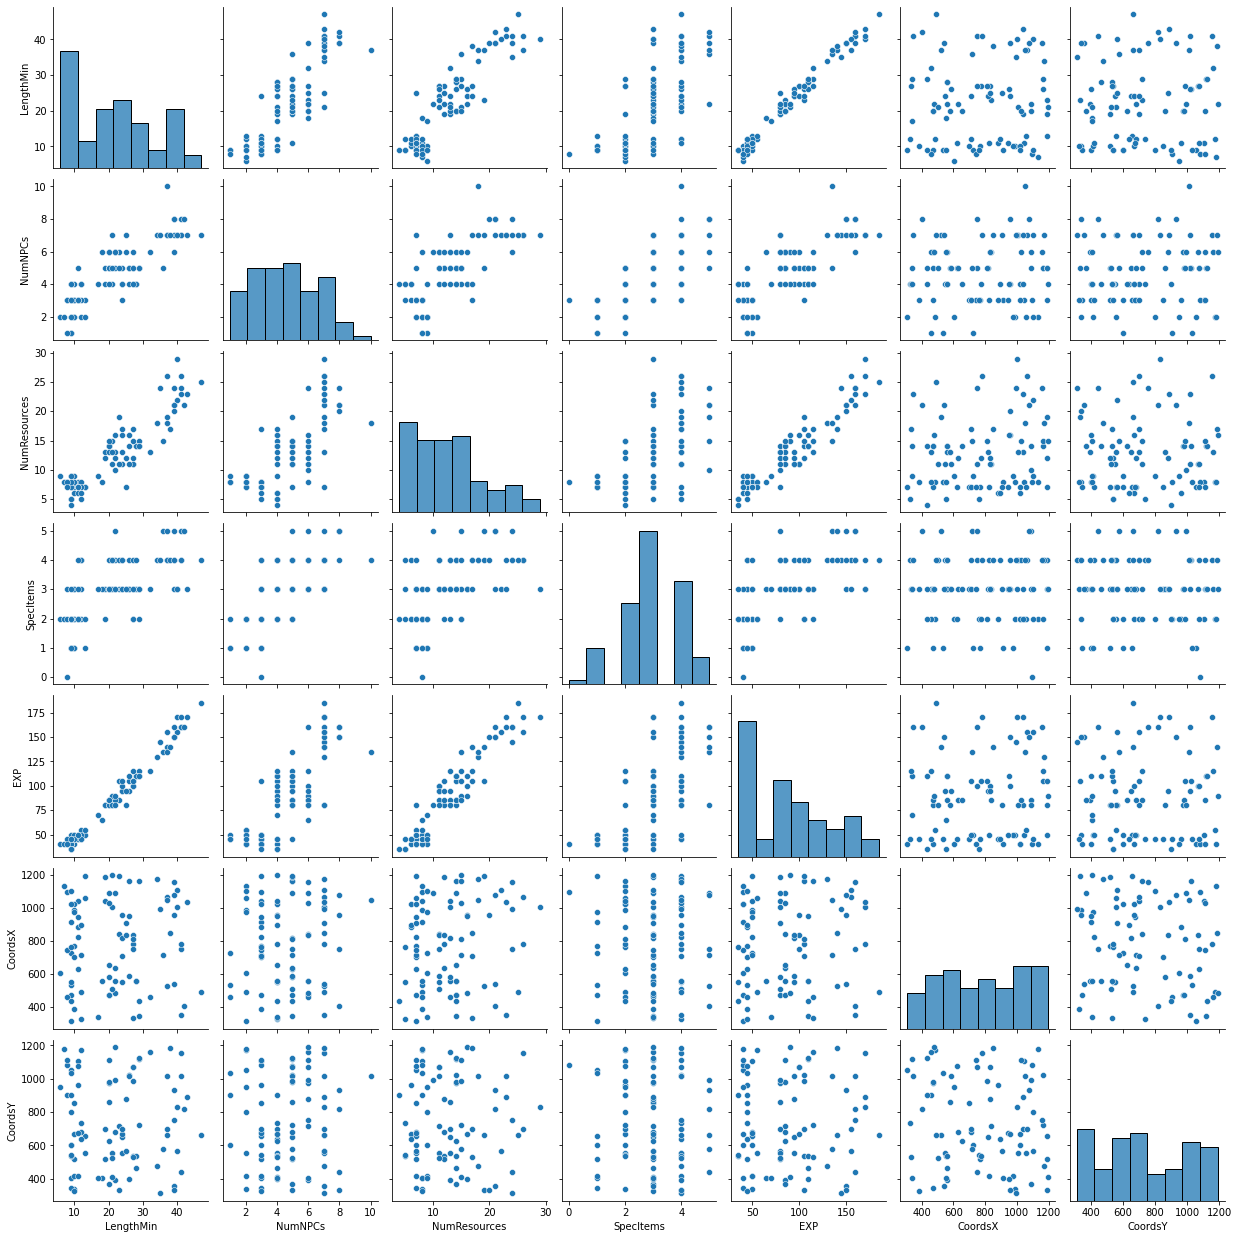

In [5]:
df = pd.read_csv('data/quest_data.csv')
# Display the pairwise relationship using seaborn
sns.pairplot(df)

# Show the plot
plt.show()

**Report:** Based on the pairplot answer the following questions: (3 points)
-- Do you recognize any data distribution? (e.g. Gaussian, uniform)
-- Are there any correlated feature pairs?
-- Is selecting some features sufficient for finding (well separable) clusters in the data?

-- Do you recognize any data distribution? (e.g. Gaussian, uniform)

There are a few recognizable data distrubutions. For examle SpecItems is Gaussian Distribution.

-- Are there any correlated feature pairs?


Yes there are correlated feature pairs for example: lenghtMin and EXP.

-- Is selecting some features sufficient for finding (well separable) clusters in the data?

Yes, because we should look for features that give us as much information as possible. Number of NPCs is good example for a feature with much of importance.


## 2.2 Preprocessing and PCA (21 points)

**Task:** In this task you will experience that preprocessing the dataset before using PCA could lead to results better for clustering. Create the following versions:

1) Apply PCA on the original dataset without preprocessing. (2 points)
2) Scale the data using an appropriate scaler and apply PCA on the scaled data. (4 points)
3) Remove noise features from the data (e.g. features with uniform distribution), scale the reduced dataset and apply PCA on the scaled data. (6 points)

For each version create a scatter plot using the principal components and print out the explained variance. (3 points)

**Hint:** You can use the PCA implementation from sklearn.decomposition and an appropriate scaler from sklearn.preprocessing.

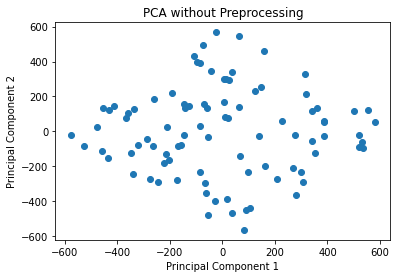

Explained variance (Version 1):
[0.55736074 0.42943012]


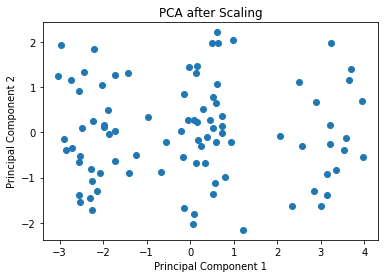

Explained variance (Version 2):
[0.59086788 0.16174864]


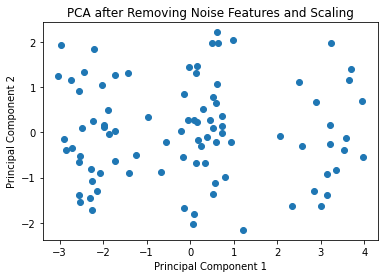

Explained variance (Version 3):
[0.59086788 0.16174864]


In [10]:
pca1 = PCA(n_components=2)
pca1.fit(df)
df_pca1 = pca1.transform(df)

plt.scatter(df_pca1[:, 0], df_pca1[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA without Preprocessing')
plt.show()

print("Explained variance (Version 1):")
print(pca1.explained_variance_ratio_)

# Version 2: Scale the data using StandardScaler and apply PCA on the scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca2 = PCA(n_components=2)
pca2.fit(scaled_data)
df_pca2 = pca2.transform(scaled_data)

plt.scatter(df_pca2[:, 0], df_pca2[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA after Scaling')
plt.show()

print("Explained variance (Version 2):")
print(pca2.explained_variance_ratio_)

# Version 3: Remove noise features, scale the reduced dataset, and apply PCA on the scaled data
# Identify and remove features with uniform distribution
noise_features = []
for column in df.columns:
    if df[column].nunique() == 1:
        noise_features.append(column)

reduced_df = df.drop(noise_features, axis=1)

scaler = StandardScaler()
reduced_scaled_data = scaler.fit_transform(reduced_df)

pca3 = PCA(n_components=2)
pca3.fit(reduced_scaled_data)
df_pca3 = pca3.transform(reduced_scaled_data)

plt.scatter(df_pca3[:, 0], df_pca3[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA after Removing Noise Features and Scaling')
plt.show()

print("Explained variance (Version 3):")
print(pca3.explained_variance_ratio_)

**Report:** Based on your experiments and knowledge from the lectures, explain why you get better or worse results when scaling and removing noise features from this dataset. (6 points)

**Hint:** You could consider the general goal of PCA, the explained variance, or compare the variance of the features (e.g. with the var() method of pandas DataFrames).

Scaling the Data:
Scaling the data is an important preprocessing step before applying PCA. The goal of scaling is to ensure that all the features have a similar scale and magnitude. This is necessary because PCA is sensitive to the relative variances of the features. When the features have significantly different scales, PCA tends to be dominated by the features with larger variances. Scaling the data helps to alleviate this issue and allows PCA to give equal weight to each feature.

By using an appropriate scaler like StandardScaler or MinMaxScaler, we normalize the features to have zero mean and unit variance or to a specific range, respectively. This normalization ensures that each feature contributes equally to the variance calculation during PCA. As a result, the principal components obtained after scaling the data can better capture the underlying patterns and structure of the dataset.

Removing Noise Features:
Noise features refer to those features that do not provide any meaningful or useful information for the analysis. These features often have a uniform or near-uniform distribution, meaning they have little variation and do not contribute much to the overall variance of the dataset.

Removing noise features before applying PCA has several benefits. First, it reduces the dimensionality of the dataset, which can help alleviate the curse of dimensionality and improve computational efficiency. Second, by discarding noise features, we focus the analysis on the more informative features that contain the most relevant information. This can lead to a clearer separation of clusters or groups in the dataset, making the resulting principal components more representative of the underlying structure.

Additionally, removing noise features reduces the noise-induced variation in the dataset, which can positively impact the explained variance. When noise features are included, they can increase the overall variance of the dataset, diluting the contribution of the meaningful features. By removing these noise features, the explained variance becomes more concentrated on the relevant components, providing a better representation of the dataset's structure.

In summary, scaling the data before applying PCA ensures that each feature has equal importance in capturing the underlying structure. Removing noise features helps to focus the analysis on the informative features, reducing the dimensionality and noise-induced variation. These preprocessing steps can result in better results for clustering and visualization tasks, as the principal components obtained will better represent the meaningful patterns in the dataset.

## 2.3 Non-Negative Matrix Factorization (6 points)

**Task:** Apply NMF on the data based on your experience from Task 2.2. Create a scatter plot of the solutions. (6 points)

**Hint:** You can use the NMF implementation from sklearn.decomposition. What properties need the dataset have to apply NMF on it? Transform the data by using an appropriate scaler from sklearn.preprocessing.

C:\Users\Bartek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Bartek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


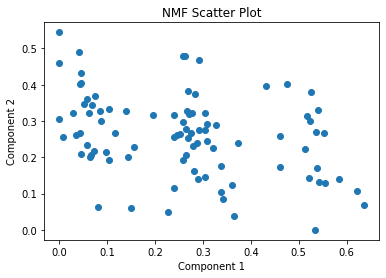

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Apply NMF on the scaled data
nmf = NMF(n_components=2)
nmf.fit(scaled_data)
df_nmf = nmf.transform(scaled_data)

# Create a scatter plot of the solutions
plt.scatter(df_nmf[:, 0], df_nmf[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Scatter Plot')
plt.show()

 What properties need the dataset have to apply NMF on it?
 
 Dataset has to be non negative!